In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from verta.integrations.keras import VertaCallback


from verta import Client
import copy



In [2]:
path_Fourth_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Fourth_Sticker'

# Importing Modes for Fourth Sticker

- IQ data are raw time series directly exported from SignalVU

In [3]:
Sticker_BackgroundRFactivities = pd.read_csv(path_Fourth_sticker+'/BackgroundRFactivities.csv')
Sticker_Connected = pd.read_csv(path_Fourth_sticker+'/Connected.csv')
Sticker_Searching = pd.read_csv(path_Fourth_sticker+'/Searching.csv')
Sticker_Searching_without_connected = pd.read_csv(path_Fourth_sticker+'/Searching_without_connecting_to_app.csv')

### Example of  how one mode of I Q Samples looks like [ Connected ]


In [4]:
Sticker_Connected

,Version,0.3
0,0.000051,0.000016
1,-0.000015,-0.000024
2,-0.000015,0.000045
3,-0.000033,-0.000005
4,-0.000067,0.000008
...,...,...
3386995,0.000013,0.000032
3386996,-0.000011,0.000021
3386997,0.000004,-0.000011
3386998,-0.000045,-0.000050


In [5]:
# Renaming the Title of each coloum 

Sticker_BackgroundRFactivities=Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Connected=Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Searching=Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Searching_without_connected=Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})


In [6]:
Sticker_Connected

,I_Data,Q_Data
0,0.000051,0.000016
1,-0.000015,-0.000024
2,-0.000015,0.000045
3,-0.000033,-0.000005
4,-0.000067,0.000008
...,...,...
3386995,0.000013,0.000032
3386996,-0.000011,0.000021
3386997,0.000004,-0.000011
3386998,-0.000045,-0.000050


In [7]:
# converting Pandas to Numpy for easier plotting
Sticker_BackgroundRFactivities_numpy = Sticker_BackgroundRFactivities.to_numpy()
Sticker_Connected_numpy = Sticker_Connected.to_numpy()
Sticker_Searching_numpy = Sticker_Searching.to_numpy()
Sticker_Searching_without_connected_numpy = Sticker_Searching_without_connected.to_numpy()

## FFT BackGround RF Activities [ Third Sticker ]

- Without Absolute Intensity Background RF activities

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


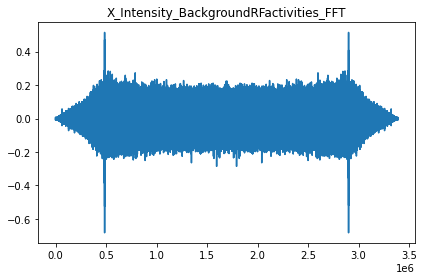

In [8]:
# Index 0 : I Data
# Index 1 : Q Data 

I_Data_BackgroundRFactivities_FFT = Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_BackgroundRFactivities_FFT = Sticker_BackgroundRFactivities_numpy[0:,1]


X_Intensity_BackgroundRFactivities_FFT = np.fft.fftshift(fft(I_Data_BackgroundRFactivities_FFT[:]-np.mean(I_Data_BackgroundRFactivities_FFT[:])))
plt.plot(X_Intensity_BackgroundRFactivities_FFT)
plt.title("X_Intensity_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

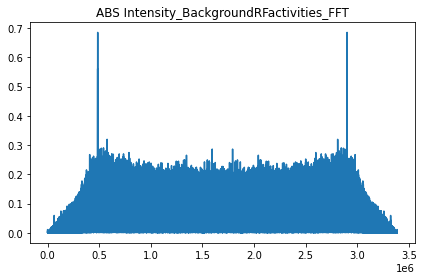

In [9]:
X_Intensity_BackgroundRFactivities_FFT_ABS = abs(np.fft.fftshift(fft(I_Data_BackgroundRFactivities_FFT[:]-np.mean(I_Data_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Intensity_BackgroundRFactivities_FFT_ABS)
plt.title("ABS Intensity_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

- Without Absolute Quadrature Background RF activities

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


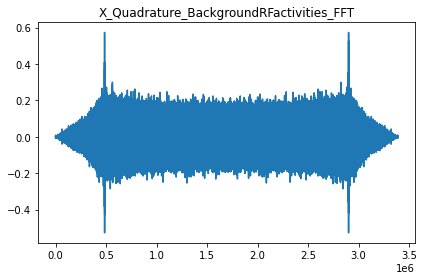

In [10]:
X_Quadrature_BackgroundRFactivities_FFT = np.fft.fftshift(fft(Q_Data_BackgroundRFactivities_FFT[:]-np.mean(Q_Data_BackgroundRFactivities_FFT[:])))
plt.plot(X_Quadrature_BackgroundRFactivities_FFT)
plt.title("X_Quadrature_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

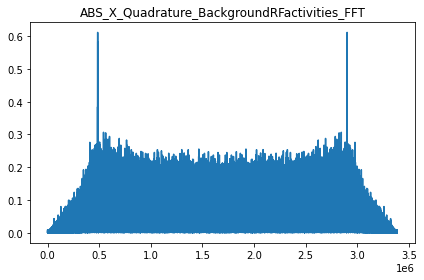

In [11]:
X_Quadrature_BackgroundRFactivities_FFT_ABS = abs(np.fft.fftshift(fft(Q_Data_BackgroundRFactivities_FFT[:]-np.mean(Q_Data_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Quadrature_BackgroundRFactivities_FFT_ABS)
plt.title("ABS_X_Quadrature_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

# FFT Connected [ Fourth Sticker ]

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


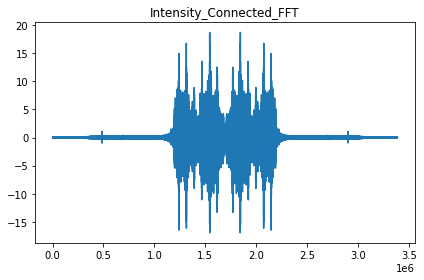

In [12]:
I_Data_Connected_FFT = Sticker_Connected_numpy[0:,0]
Q_Data_Connected_FFT = Sticker_Connected_numpy[0:,1]


X_Intensity_FFT_Connected = np.fft.fftshift(fft(I_Data_Connected_FFT[:]-np.mean(I_Data_Connected_FFT[:])))
plt.plot(X_Intensity_FFT_Connected )
plt.title("Intensity_Connected_FFT")
plt.tight_layout()
plt.show()

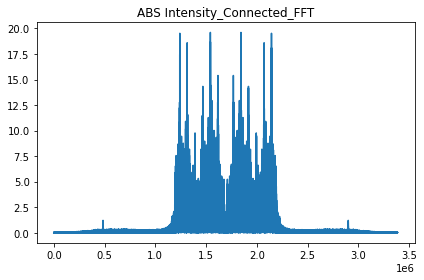

In [13]:

X_Intensity_FFT_Connected_ABS = abs(np.fft.fftshift(fft(I_Data_Connected_FFT[:]-np.mean(I_Data_Connected_FFT[:]))))
plt.plot(X_Intensity_FFT_Connected_ABS )
plt.title("ABS Intensity_Connected_FFT")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


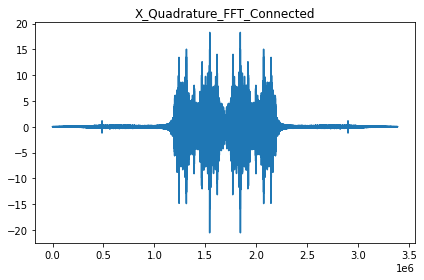

In [14]:
X_Quadrature_FFT_Connected = np.fft.fftshift(fft(Q_Data_Connected_FFT[:]-np.mean(Q_Data_Connected_FFT[:])))
plt.plot(X_Quadrature_FFT_Connected )
plt.title("X_Quadrature_FFT_Connected")
plt.tight_layout()
plt.show()

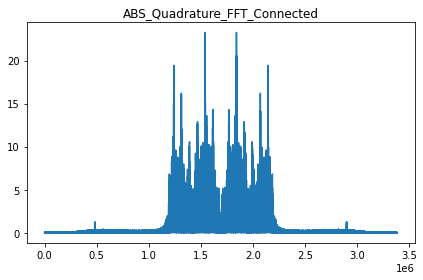

In [15]:
X_Quadrature_FFT_Connected_ABS = abs(np.fft.fftshift(fft(Q_Data_Connected_FFT[:]-np.mean(Q_Data_Connected_FFT[:]))))
plt.plot(X_Quadrature_FFT_Connected_ABS )
plt.title("ABS_Quadrature_FFT_Connected")
plt.tight_layout()
plt.show()

# FFT Searching [ Fourth sticker ]

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


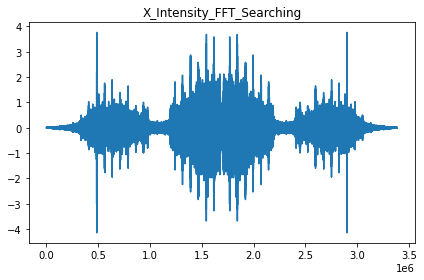

In [16]:
I_Data_Searching_FFT = Sticker_Searching_numpy[0:,0]
Q_Data_Searching_FFT = Sticker_Searching_numpy[0:,1]


X_Intensity_FFT_Searching = np.fft.fftshift(fft(I_Data_Searching_FFT[:]-np.mean(I_Data_Searching_FFT[:])))
plt.plot(X_Intensity_FFT_Searching )
plt.title("X_Intensity_FFT_Searching")
plt.tight_layout()
plt.show()

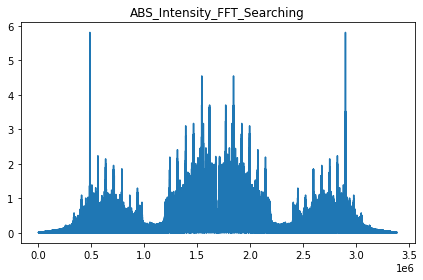

In [17]:

X_Intensity_FFT_Searching_ABS = abs(np.fft.fftshift(fft(I_Data_Searching_FFT[:]-np.mean(I_Data_Searching_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching_ABS )
plt.title("ABS_Intensity_FFT_Searching")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


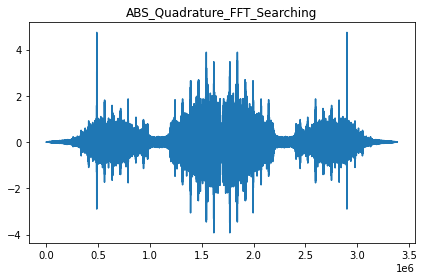

In [18]:
X_Quadrature_FFT_Searching = np.fft.fftshift(fft(Q_Data_Searching_FFT[:]-np.mean(Q_Data_Searching_FFT[:])))
plt.plot(X_Quadrature_FFT_Searching)
plt.title("ABS_Quadrature_FFT_Searching")
plt.tight_layout()
plt.show()

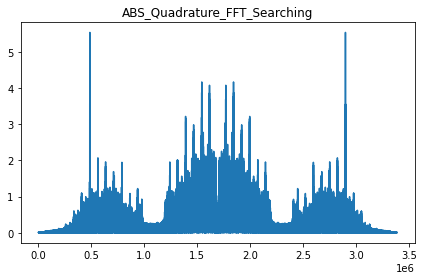

In [19]:
X_Quadrature_FFT_Searching_ABS = abs(np.fft.fftshift(fft(Q_Data_Searching_FFT[:]-np.mean(Q_Data_Searching_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching_ABS )
plt.title("ABS_Quadrature_FFT_Searching")
plt.tight_layout()
plt.show()

# Searching with WIFI established [ Fourth Sticker ] 

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


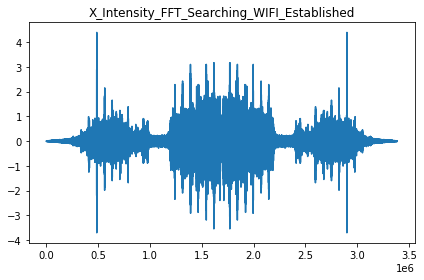

In [20]:
I_Data_Searching_WIFI_established_FFT = Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_Searching_WIFI_established_FFT = Sticker_Searching_without_connected_numpy[0:,1]

X_Intensity_FFT_Searching_WIFI_established = np.fft.fftshift(fft(I_Data_Searching_WIFI_established_FFT[:]-np.mean(I_Data_Searching_WIFI_established_FFT[:])))
plt.plot(X_Intensity_FFT_Searching_WIFI_established )
plt.title("X_Intensity_FFT_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

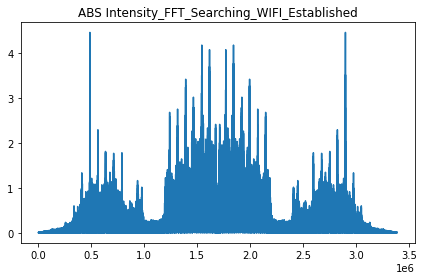

In [21]:
I_Data_Searching_WIFI_established_FFT = Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_Searching_WIFI_established_FFT = Sticker_Searching_without_connected_numpy[0:,1]

X_Intensity_FFT_Searching_WIFI_established_ABS = abs(np.fft.fftshift(fft(I_Data_Searching_WIFI_established_FFT[:]-np.mean(I_Data_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching_WIFI_established_ABS )
plt.title("ABS Intensity_FFT_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


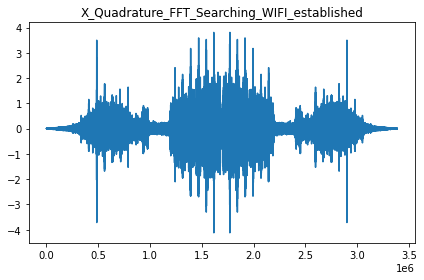

In [22]:
X_Quadrature_FFT_Searching_WIFI_established = np.fft.fftshift(fft(Q_Data_Searching_WIFI_established_FFT[:]-np.mean(Q_Data_Searching_WIFI_established_FFT[:])))
plt.plot(X_Quadrature_FFT_Searching_WIFI_established )
plt.title("X_Quadrature_FFT_Searching_WIFI_established")
plt.tight_layout()
plt.show()

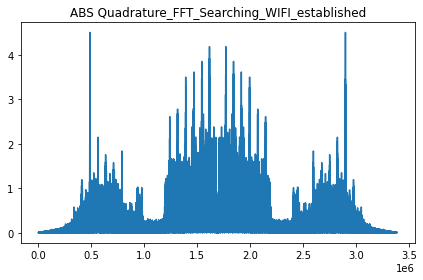

In [23]:
X_Quadrature_FFT_Searching_WIFI_established_ABS = abs(np.fft.fftshift(fft(Q_Data_Searching_WIFI_established_FFT[:]-np.mean(Q_Data_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching_WIFI_established_ABS )
plt.title("ABS Quadrature_FFT_Searching_WIFI_established")
plt.tight_layout()
plt.show()

# Machine Learning

- Complex Number I+jQ 

In [24]:
I_Data_Searching_WIFI_established_FFT

array([-1.8300e-05, -1.1970e-05,  1.3000e-05, ...,  1.2139e-04,
       -1.7735e-04,  1.7610e-05])

In [25]:
Q_Data_Searching_WIFI_established_FFT

array([-1.3000e-05,  2.9730e-05,  3.7120e-05, ...,  1.3939e-04,
        7.2340e-05, -1.4836e-04])

In [26]:
complex_num_Searching_WIFI_Established = I_Data_Searching_WIFI_established_FFT + 1j*Q_Data_Searching_WIFI_established_FFT

In [27]:
complex_num_Searching_WIFI_Established

array([-1.8300e-05-1.3000e-05j, -1.1970e-05+2.9730e-05j,
        1.3000e-05+3.7120e-05j, ...,  1.2139e-04+1.3939e-04j,
       -1.7735e-04+7.2340e-05j,  1.7610e-05-1.4836e-04j])

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


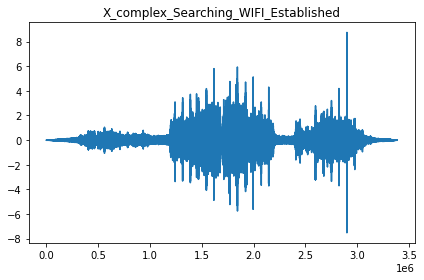

In [28]:
X_complex_Searching_WIFI_Established = (np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))
plt.plot(X_complex_Searching_WIFI_Established )
plt.title("X_complex_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

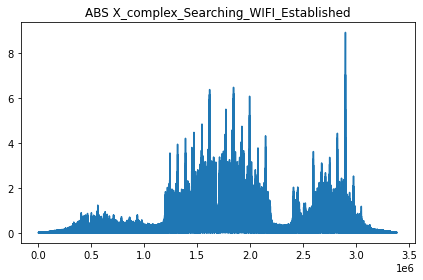

In [29]:
X_complex_Searching_WIFI_Established_ABS = abs(np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))
plt.plot(X_complex_Searching_WIFI_Established_ABS )
plt.title("ABS X_complex_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

# Complex Signal I&Q  Dataset

In [30]:
complex_num_Searching_WIFI_Established = I_Data_Searching_WIFI_established_FFT + 1j*Q_Data_Searching_WIFI_established_FFT
complex_num_Connected = I_Data_Connected_FFT+1j*Q_Data_Connected_FFT
complex_num_Background = I_Data_BackgroundRFactivities_FFT+1j*Q_Data_BackgroundRFactivities_FFT
complex_num_Searching = I_Data_Searching_FFT+1j*Q_Data_Searching_FFT

In [31]:
X_complex_Connected = abs(np.fft.fftshift(fft(complex_num_Connected[:]-np.mean(complex_num_Connected[:]))))
X_complex_Searching = abs(np.fft.fftshift(fft(complex_num_Searching[:]-np.mean(complex_num_Searching[:]))))
X_complex_Background = abs(np.fft.fftshift(fft(complex_num_Background[:]-np.mean(complex_num_Background[:]))))
X_complex_Searching_WIFI_Established = abs(np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))

In [32]:
print("Shape of one mode : "+ str(X_complex_Background.shape))

Shape of one mode : (3387000,)


# Reshaping


In [33]:
Size_of_Input_Feature = 500
size = X_complex_Background.shape[0]
Divided = int(size / Size_of_Input_Feature)


In [34]:
X_complex_Connected= X_complex_Connected.reshape(Divided,Size_of_Input_Feature)
X_complex_Searching= X_complex_Searching.reshape(Divided,Size_of_Input_Feature)
X_complex_Background= X_complex_Background.reshape(Divided,Size_of_Input_Feature)
X_complex_Searching_WIFI_Established= X_complex_Searching_WIFI_Established.reshape(Divided,Size_of_Input_Feature)

In [35]:
print("Shape of one mode after reshaping : "+ str(X_complex_Background.shape))

Shape of one mode after reshaping : (6774, 500)


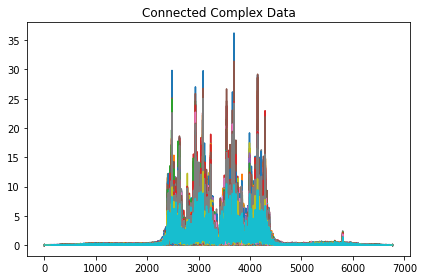

In [36]:
plt.plot(X_complex_Connected[0:])
plt.title("Connected Complex Data")
plt.tight_layout()
plt.show()

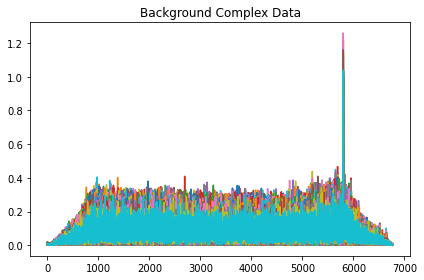

In [37]:
plt.plot(X_complex_Background[0:])
plt.title("Background Complex Data")
plt.tight_layout()
plt.show()

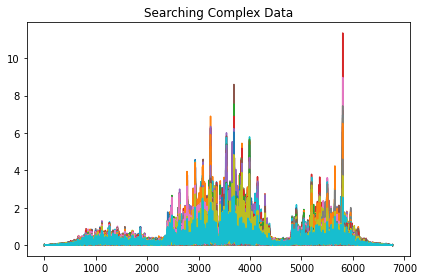

In [38]:
plt.plot(X_complex_Searching[0:])
plt.title("Searching Complex Data")
plt.tight_layout()
plt.show()

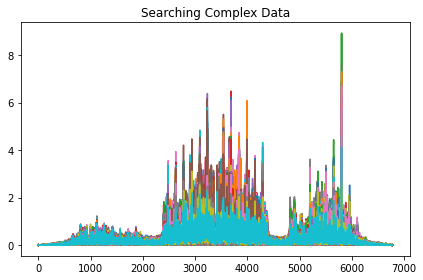

In [39]:
plt.plot(X_complex_Searching_WIFI_Established[0:])
plt.title("Searching Complex Data")
plt.tight_layout()
plt.show()

# Labelling

In [40]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [41]:
np.random.seed(2016)

Complex_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(X_complex_Background.shape[0],1))
Complex_BackgroundRFactivites_dataset=np.concatenate((X_complex_Background,Complex_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_BackgroundRFactivites_dataset.shape))

Complex_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(X_complex_Connected.shape[0],1))
Complex_connected_dataset=np.concatenate((X_complex_Connected,Complex_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_connected_dataset.shape))

Complex_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(X_complex_Searching.shape[0],1))
Complex_searching_dataset=np.concatenate((X_complex_Searching,Complex_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_searching_dataset.shape))

Complex_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(X_complex_Searching_WIFI_Established.shape[0],1))
Complex_searching_wifi_established_dataset=np.concatenate((X_complex_Searching_WIFI_Established,Complex_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_searching_wifi_established_dataset.shape))

print('\n')
print(Complex_BackgroundRFactivites_dataset[0:5])
print('\n')
print(Complex_connected_dataset[0:5])
print('\n')
print(Complex_searching_dataset[0:5])
print('\n')
print(Complex_searching_wifi_established_dataset[0:5])

Connected dataset shape : (6774, 504)
Connected dataset shape : (6774, 504)
Connected dataset shape : (6774, 504)
Connected dataset shape : (6774, 504)


[[0.00228627 0.00538528 0.00230335 ... 0.         0.         0.        ]
 [0.00326198 0.01568729 0.00745955 ... 0.         0.         0.        ]
 [0.00586802 0.0070686  0.00284806 ... 0.         0.         0.        ]
 [0.00179848 0.00084429 0.00287133 ... 0.         0.         0.        ]
 [0.00439804 0.00182167 0.00214114 ... 0.         0.         0.        ]]


[[0.01736512 0.01557542 0.01996331 ... 1.         0.         0.        ]
 [0.04224587 0.03563676 0.02027621 ... 1.         0.         0.        ]
 [0.01411616 0.01905079 0.0186691  ... 1.         0.         0.        ]
 [0.04169812 0.03289174 0.02255308 ... 1.         0.         0.        ]
 [0.0132794  0.01812883 0.01930533 ... 1.         0.         0.        ]]


[[0.01139727 0.00419759 0.00320376 ... 0.         1.         0.        ]
 [0.00434829 0.01226792 0.01746501 ..

In [42]:
import copy
stacked_data=np.vstack((Complex_BackgroundRFactivites_dataset,Complex_connected_dataset,Complex_searching_dataset,Complex_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)


In [43]:
length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #2800
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #800 #3600
print(length_of_X_validation)

24386


In [44]:
Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:Size_of_Input_Feature]
print(Train_Dataset.shape)
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,Size_of_Input_Feature:]
print(Y_Train_Dataset)

(18967, 500)
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [45]:
Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:Size_of_Input_Feature]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,Size_of_Input_Feature:]
print(Validation_Dataset.shape)

(5419, 500)


In [46]:
Train_Dataset=Train_Dataset.reshape(18967,500,1)
Validation_Dataset=Validation_Dataset.reshape(5419,500,1)
print(Validation_Dataset.shape)

(5419, 500, 1)


In [47]:
  
import keras
import keras.models as models
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, Conv1D, MaxPooling1D
from keras.layers.core import Flatten, Dense, Dropout, Activation, Reshape

def getBaselineModel(slice_size, classes=4, cnn_stacks=3, fc_stacks=1, channels=128, dropout_flag=True, \
                        fc1=256, fc2=128, batchnorm=False, \
                        #optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), \
                        loss='categorical_crossentropy'):
    """A dummy model to test the functionalities of the Data Generator"""
    model = models.Sequential()
    model.add(Conv1D(channels,7,activation='relu', padding='same', input_shape=(slice_size, 1)))
    model.add(Conv1D(channels,5, padding='same'))
    if batchnorm:
        model.add(keras.layers.BatchNormalization(momentum=0.9, name='bn_1'))
    model.add(Activation('relu'))
    model.add(MaxPooling1D())
    for i in range(1, cnn_stacks):
        model.add(Conv1D(channels,7,activation='relu', padding='same'))
        model.add(Conv1D(channels,5, padding='same'))
        if batchnorm:
            model.add(keras.layers.BatchNormalization(momentum=0.9, name='bn_'+str(i+1)))
        model.add(Activation('relu'))
        model.add(MaxPooling1D())
    #model.add(Conv1D(128,7,activation='relu', padding='same'))
    #model.add(Conv1D(128,5,activation='relu', padding='same'))
    #model.add(MaxPooling1D())
    model.add(Flatten())
    for j in range(1, fc_stacks):
        model.add(Dense(fc1, activation='relu'))
        if dropout_flag:
            model.add(Dropout(0.5))
    model.add(Dense(fc2, activation='relu'))
    if dropout_flag:
        model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))

    #optimizer = optimizer
    #optimizer = Adam(lr=lr, beta_1=beta_2, beta_2=beta_2, epsilon=epsilon, decay=decay, amsgrad=amsgrad)
    #model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    #model.summary()

    return model

In [54]:
model_1223 = getBaselineModel(slice_size=500)

In [55]:
model_1223.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
history3 = model_1223.fit(Train_Dataset, Y_Train_Dataset, epochs=6000, batch_size=100,validation_data=(Validation_Dataset, Y_Validation_Dataset),
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')])

Epoch 1/6000
190/190 [==============================] - 5s 27ms/step - loss: 1.1810 - accuracy: 0.4143 - val_loss: 1.0689 - val_accuracy: 0.4842
Epoch 2/6000
190/190 [==============================] - 5s 25ms/step - loss: 0.9964 - accuracy: 0.5028 - val_loss: 0.9331 - val_accuracy: 0.5507
Epoch 3/6000
190/190 [==============================] - 5s 26ms/step - loss: 0.9300 - accuracy: 0.5404 - val_loss: 0.8895 - val_accuracy: 0.5669
Epoch 4/6000
190/190 [==============================] - 5s 26ms/step - loss: 0.8822 - accuracy: 0.5669 - val_loss: 0.8204 - val_accuracy: 0.6167
Epoch 5/6000
190/190 [==============================] - 5s 26ms/step - loss: 0.8250 - accuracy: 0.6079 - val_loss: 0.7749 - val_accuracy: 0.6411
Epoch 6/6000
190/190 [==============================] - 5s 26ms/step - loss: 0.7747 - accuracy: 0.6371 - val_loss: 0.9148 - val_accuracy: 0.5881
Epoch 7/6000
190/190 [==============================] - 5s 26ms/step - loss: 0.7531 - accuracy: 0.6448 - val_loss: 0.6789 - val_ac

# Loss Curve - Training and Validation Loss

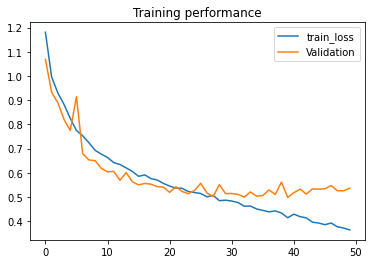

In [58]:
plt.figure()
plt.title('Training performance')
plt.plot(history3.history['loss'], label='train_loss')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [60]:
_, accuracy_validation = model_1223.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy_validation: %.2f' % (accuracy_validation*100))



170/170 [==============================] - 1s 5ms/step - loss: 0.5365 - accuracy: 0.7942
Accuracy_validation: 79.42


In [61]:
model_1223.save("{Model FFT Cov1D} Fourth sticker Trained")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: {Model FFT Cov1D} Fourth sticker Trained/assets


# Using Fifth Model as Trained Model 

In [48]:
from tensorflow import keras
load_Fifth_sticker_model = keras.models.load_model("{Model FFT Cov1D} Fifth sticker Trained")
_,accuracy=load_Fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

170/170 [==============================] - 1s 5ms/step - loss: 1.3508 - accuracy: 0.5937
59.36519503593445


# Using Third Model as Trained Model

In [49]:
from tensorflow import keras
load_third_sticker_model = keras.models.load_model("{Model FFT Cov1D} Third sticker Trained")
_,accuracy=load_third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

170/170 [==============================] - 1s 4ms/step - loss: 3.4643 - accuracy: 0.5556
55.56375980377197


# Using First Model as Trained Model

In [51]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("{Model FFT Cov1D} First sticker Trained")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

170/170 [==============================] - 1s 4ms/step - loss: 6.8629 - accuracy: 0.3562
35.61542630195618


# Using Fourth Model as Trained Model [ Validation own ]

In [50]:
from tensorflow import keras
load_fourth_sticker_model = keras.models.load_model("{Model FFT Cov1D} Fourth sticker Trained")
_,accuracy=load_fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

170/170 [==============================] - 1s 4ms/step - loss: 0.5365 - accuracy: 0.7942
79.42425012588501
